In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import numpy as np
from scipy.stats import spearmanr

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [8]:
directory_loc = r"C:\Users\shreejoy_tripathy\Documents\GitHub\Conductance_Parameter"

In [24]:
#csv file of all electrophysiology, morphology features, ion conductance, nm_id
all_features = pd.read_csv(directory_loc + "/all_features.csv", index_col=0)
#csv file of all electrophysiology, morphology features, ion conductance, nm_id, including cell type
all_features_cell_type = pd.read_csv(directory_loc + "/all_features_cell_type.csv", index_col=0)

abs_all_features = pd.read_csv(directory_loc + "/abs_all_features.csv", index_col=0)

#transcriptomic gene expression data by cell type
transcriptome_df = pd.read_csv(directory_loc + "/transcriptome_df.csv", index_col=0)
#transcriptomic gene expressions data with all separate cortical layers
new_transcriptome_df = pd.read_csv(directory_loc + "/sep_layer_df.csv", index_col=0)
#transcriptomic gene expression data with only cre-line
new_label_df = pd.read_csv(directory_loc + "/new_label_transcriptome_df.csv", index_col=0)

#relavtive ion conductance data for only cre-lines
cre_parameter_df = pd.read_csv(directory_loc + "/cre_parameter_df.csv", index_col=0)
#absolute ion conductance data for cell types
abs_parameter_df = pd.read_csv(directory_loc + "/abs_parameter_df.csv", index_col=0)
#relative conductance data for cell types
sep_layer_cre_parameter_df = pd.read_csv('sep_layer_cre_parameter_df.csv', index_col=0)

#csv for entrenz symbol and associated gene
entrenz_symbol_s = pd.read_csv("entrenz_symbol_s.csv", index_col=0)

#csv file about channel genes and their associated ion channels
ion_channel_genes = pd.read_csv("targets_and_families.csv", index_col=0)

#Spearman Correlation ranks at cre-line level
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

#Spearman Correlation ranks for cell types and relative conductance
f = open("sep_spearman_corr_ranks.json","r")
data = json.load(f)
sep_spearman_corr_ranks = data
f.close()

#Spearman Correlation ranks for cell types and absolute conductance
#f = open("abs_spearman_corr_ranks.json","r")
#data = json.load(f)
#abs_spearman_corr_ranks = data
#f.close()



sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Parameter names
parameters = ['gbar_Im',
              'gbar_Ih',
              'gbar_NaTs',
              'gbar_Nap',
              'gbar_K_P',
              'gbar_K_T',
              'gbar_SK',
              'gbar_Kv3_1',
              'gbar_Ca_HVA',
              'gbar_Ca_LVA',
              'gamma_CaDynamics',
              'decay_CaDynamics',
              'soma_g_pas',
              'axon_g_pas',
              'dend_g_pas',
              'apic_g_pas',
              'gbar_NaV',
              'gbar_Kd',
              'gbar_Kv2like',
              'gbar_Im_v2']

#Parameter names for absolute conductance
abs_parameters = ['abs_gbar_Im',
 'abs_gbar_Ih',
 'abs_gbar_NaTs',
 'abs_gbar_Nap',
 'abs_gbar_K_P',
 'abs_gbar_K_T',
 'abs_gbar_SK',
 'abs_gbar_Kv3_1',
 'abs_gbar_Ca_HVA',
 'abs_gbar_Ca_LVA',
 'abs_gamma_CaDynamics',
 'abs_decay_CaDynamics',
 'abs_soma_g_pas',
 'abs_axon_g_pas',
 'abs_dend_g_pas',
 'abs_apic_g_pas',
 'abs_gbar_NaV',
 'abs_gbar_Kd',
 'abs_gbar_Kv2like',
 'abs_gbar_Im_v2']

#6 Parameters shared by all neuronal models
shared_parameters = ['gbar_Ih', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA']

#List of gene channels that are voltage gated
ion_channel_genes = ion_channel_genes[ion_channel_genes['MGI symbol'].notnull()]
gene_channel = ion_channel_genes.loc["vgic"]
gene_channel = gene_channel['MGI symbol'].values
gene_channel = list(gene_channel)

In [17]:
#Set-up for palette for cell types based on Cre-line
cre_color_inc_4 = ['Htr3a-Cre_NO152__L2/3__inh',
             'Htr3a-Cre_NO152__L5__inh',
             'Nr5a1-Cre__L4__exc',
             'Ntsr1-Cre_GN220__L6__exc',
             'Pvalb-IRES-Cre__L2/3__inh',
             'Pvalb-IRES-Cre__L4__inh',
             'Pvalb-IRES-Cre__L5__inh',
             'Pvalb-IRES-Cre__L6__inh',
             'Rbp4-Cre_KL100__L4__exc',
             'Rbp4-Cre_KL100__L5__exc',
             'Scnn1a-Tg2-Cre__L4__exc',
             'Scnn1a-Tg3-Cre__L2/3-L4__exc',
             'Sst-IRES-Cre__L1-L2/3__inh',
             'Sst-IRES-Cre__L5__inh',
             'Sst-IRES-Cre__L6__inh']

cre_line_palette_inc_4 = {'Htr3a-Cre_NO152__L2/3__inh':"#DF6BC6",
                    'Htr3a-Cre_NO152__L5__inh':"#D12DAD", 
                    'Nr5a1-Cre__L4__exc':"#43BCA9",
                    'Ntsr1-Cre_GN220__L6__exc':"#70849A",
                    'Pvalb-IRES-Cre__L2/3__inh':"#8E2331",
                    'Pvalb-IRES-Cre__L4__inh':"#CD3449",
                    'Pvalb-IRES-Cre__L5__inh':"#DB707E",
                    'Pvalb-IRES-Cre__L6__inh':"#EBB1b9",
                    'Rbp4-Cre_KL100__L4__exc':"#009B81",
                    'Rbp4-Cre_KL100__L5__exc':"#00E5BF",
                    'Scnn1a-Tg2-Cre__L4__exc':"#59B7B4",
                    'Scnn1a-Tg3-Cre__L2/3-L4__exc':"#65AA8A",
                    'Sst-IRES-Cre__L1-L2/3__inh':"#B35F1F",
                    'Sst-IRES-Cre__L5__inh':"#DD8440",
                    'Sst-IRES-Cre__L6__inh':"#E9B085"}

In [18]:
index_name = ['cell_type',
                'gbar_Im',
              'gbar_Ih',
              'gbar_NaTs',
              'gbar_Nap',
              'gbar_K_P',
              'gbar_K_T',
              'gbar_SK',
              'gbar_Kv3_1',
              'gbar_Ca_HVA',
              'gbar_Ca_LVA',
              'gamma_CaDynamics',
              'decay_CaDynamics',
              'soma_g_pas',
              'axon_g_pas',
              'dend_g_pas',
              'apic_g_pas',
              'gbar_NaV',
              'gbar_Kd',
              'gbar_Kv2like',
              'gbar_Im_v2']
stdcal = all_features_cell_type[all_features_cell_type['gbar_Ih'].notna()]
stdcal = stdcal[stdcal['cell_type'] != 'False']
stdcal = stdcal[index_name]
std = stdcal.groupby('cell_type').std()
sem = stdcal.groupby('cell_type').sem()
std.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 
sem.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 


In [19]:
abs_all_features['cell_type'] = 'False'
abs_all_features = abs_all_features[abs_all_features['cre_line'] != 'Human']
cre_layer_dendrite = abs_all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    abs_all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

stdcal = abs_all_features[abs_all_features['gbar_Ih_abs'].notna()]
stdcal = stdcal[stdcal['cell_type'] != 'False']
stdcal = stdcal[['cell_type', 'gbar_Im_abs',
              'gbar_Ih_abs',
              'gbar_NaTs_abs',
              'gbar_Nap_abs',
              'gbar_K_P_abs',
              'gbar_K_T_abs',
              'gbar_SK_abs',
              'gbar_Kv3_1_abs',
              'gbar_Ca_HVA_abs',
              'gbar_Ca_LVA_abs',
              'gamma_CaDynamics_abs',
              'decay_CaDynamics_abs',
              'soma_g_pas_abs',
              'axon_g_pas_abs',
              'dend_g_pas_abs',
              'apic_g_pas_abs',
              'gbar_NaV_abs',
              'gbar_Kd_abs',
              'gbar_Kv2like_abs',
              'gbar_Im_v2_abs']]
abs_std = stdcal.groupby('cell_type').std()
abs_sem = stdcal.groupby('cell_type').sem()
abs_std.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 
abs_sem.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 


C:\Users\shreejoy_tripathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [20]:
shortened_color = ['Htr3a L2/3', 
                   "Htr3a L5",  
             'Nr5a1 L4',
             'Ntsr1 L6',
             'Pvalb L2/3',
             'Pvalb L4',
             'Pvalb L5',
             'Pvalb L6',
             'Rbp4 L4',
             'Rbp4 L5',
             'Scnn1a-Tg2 L4',
                   'Scnn1a-Tg3 L2/3-L4',
                   'Sst L1-L2/3',
             'Sst L5',
             'Sst L6']

shortened_palette = cre_line_palette_inc_4 = {'Htr3a L2/3':"#DF6BC6",
                    'Htr3a L5':"#D12DAD", 
                    'Nr5a1 L4':"#43BCA9",
                    'Ntsr1 L6':"#70849A",
                    'Pvalb L2/3':"#8E2331",
                    'Pvalb L4':"#CD3449",
                    'Pvalb L5':"#DB707E",
                    'Pvalb L6':"#EBB1b9",
                    'Rbp4 L4':"#009B81",
                    'Rbp4 L5':"#00E5BF",
                    'Scnn1a-Tg2 L4':"#59B7B4",
                                              'Scnn1a-Tg3 L2/3-L4':"#65AA8A",
                                              'Sst L1-L2/3':"#B35F1F",
                    'Sst L5':"#DD8440",
                    'Sst L6':"#E9B085"}

In [25]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df, xlabel, ylabel):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    graph_spec.sort_values(by=[gene_id], inplace = True)
    mini = graph_spec.iloc[0, :][gene_id]
    maxi = graph_spec.iloc[14, :][gene_id]
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(mini, maxi, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)
    

    plt.show()


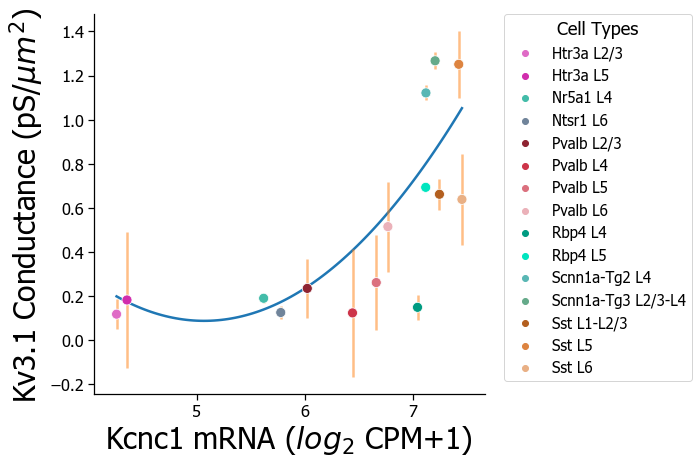

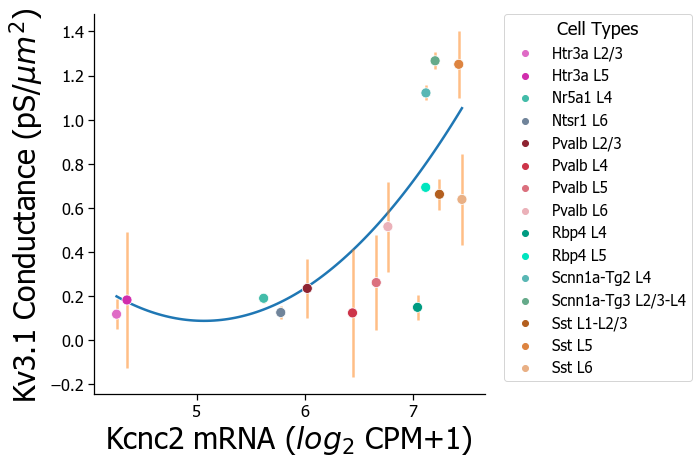

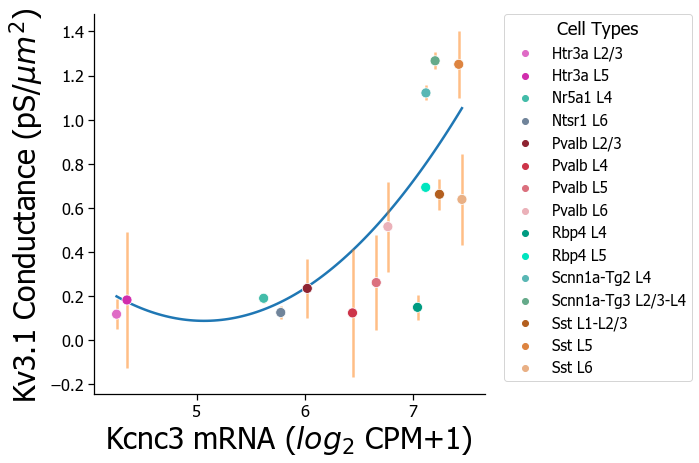

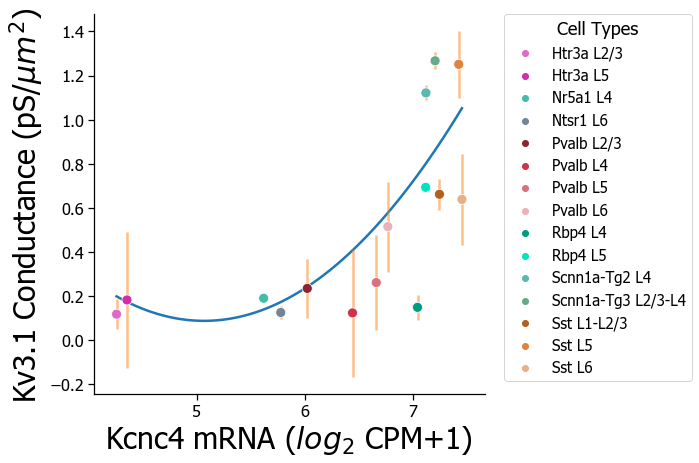

In [26]:
graph_conductance_exp_inc_4('gbar_Kv3_1', 'Kcnc1', sep_layer_cre_parameter_df, 'Kcnc1 mRNA ($log_2$ CPM+1)', 'Kv3.1 Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_Kv3_1', 'Kcnc2', sep_layer_cre_parameter_df, 'Kcnc2 mRNA ($log_2$ CPM+1)', 'Kv3.1 Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_Kv3_1', 'Kcnc3', sep_layer_cre_parameter_df, 'Kcnc3 mRNA ($log_2$ CPM+1)', 'Kv3.1 Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_Kv3_1', 'Kcnc4', sep_layer_cre_parameter_df, 'Kcnc4 mRNA ($log_2$ CPM+1)', 'Kv3.1 Conductance (pS/$\mu m^2$)')


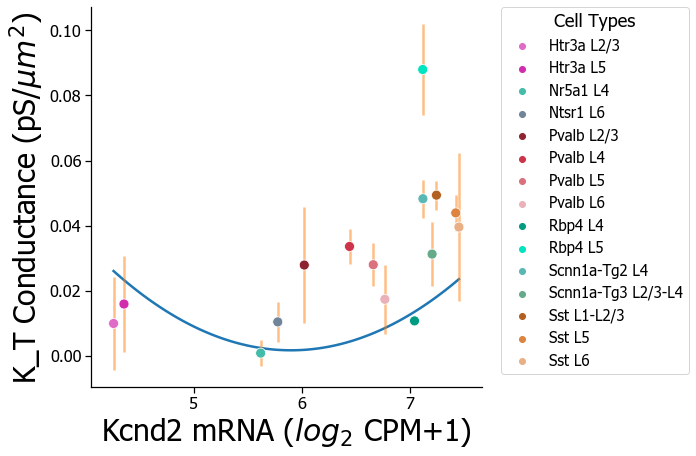

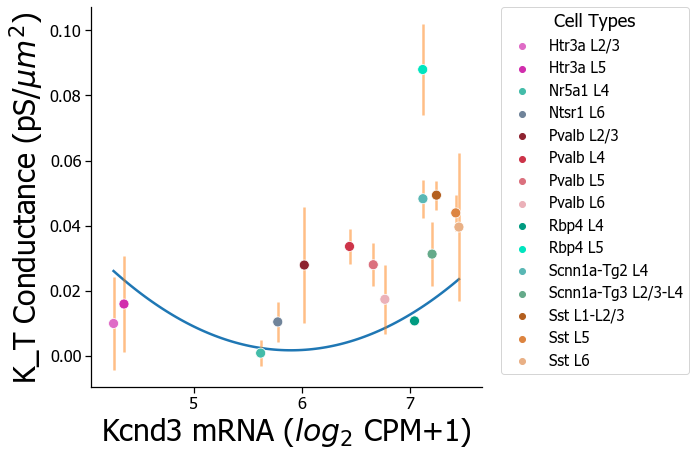

In [27]:

graph_conductance_exp_inc_4('gbar_K_T', 'Kcnd2', sep_layer_cre_parameter_df, 'Kcnd2 mRNA ($log_2$ CPM+1)', 'K_T Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_K_T', 'Kcnd3', sep_layer_cre_parameter_df, 'Kcnd3 mRNA ($log_2$ CPM+1)', 'K_T Conductance (pS/$\mu m^2$)')


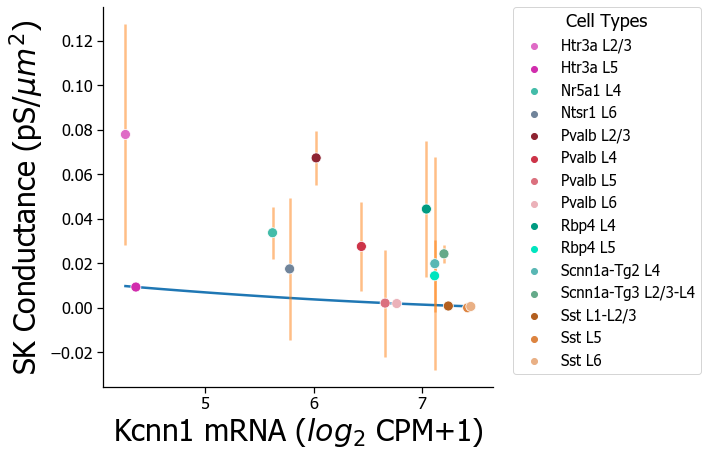

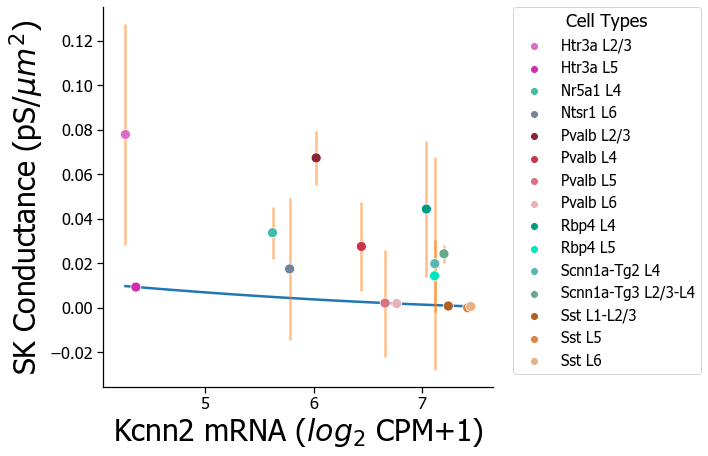

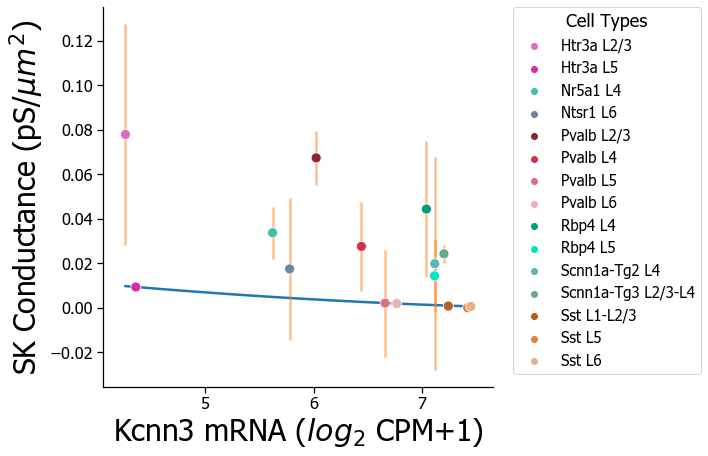

In [28]:
graph_conductance_exp_inc_4('gbar_SK', 'Kcnn1', sep_layer_cre_parameter_df, 'Kcnn1 mRNA ($log_2$ CPM+1)', 'SK Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_SK', 'Kcnn2', sep_layer_cre_parameter_df, 'Kcnn2 mRNA ($log_2$ CPM+1)', 'SK Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_SK', 'Kcnn3', sep_layer_cre_parameter_df, 'Kcnn3 mRNA ($log_2$ CPM+1)', 'SK Conductance (pS/$\mu m^2$)')


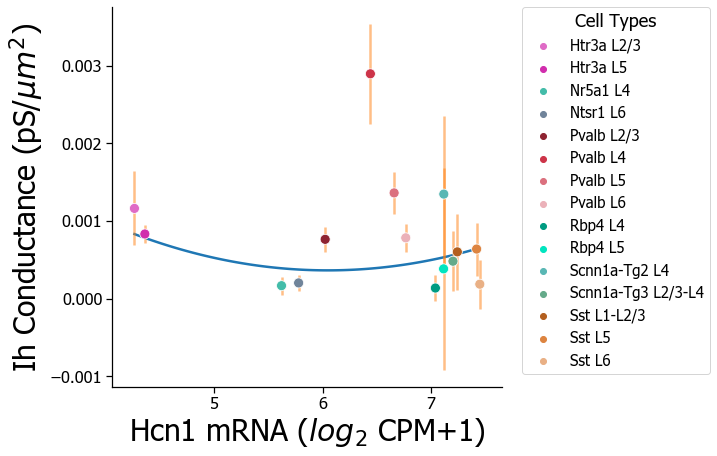

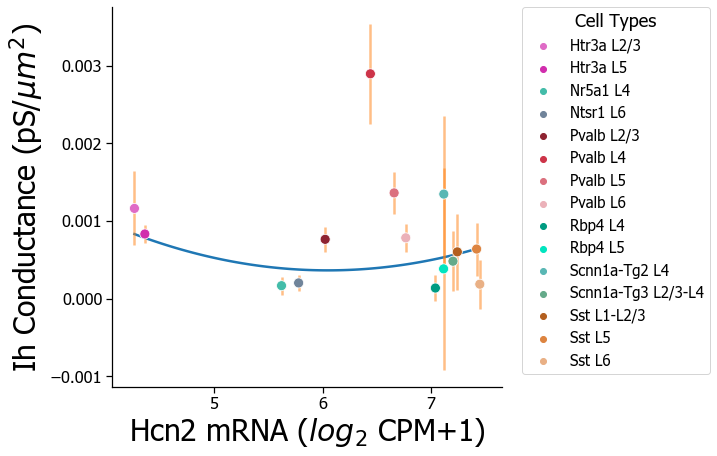

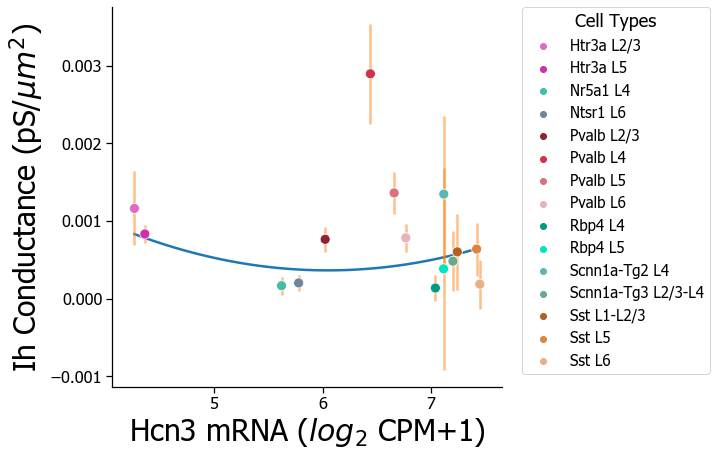

In [29]:
graph_conductance_exp_inc_4('gbar_Ih', 'Hcn1', sep_layer_cre_parameter_df, 'Hcn1 mRNA ($log_2$ CPM+1)', 'Ih Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_Ih', 'Hcn2', sep_layer_cre_parameter_df, 'Hcn2 mRNA ($log_2$ CPM+1)', 'Ih Conductance (pS/$\mu m^2$)')
graph_conductance_exp_inc_4('gbar_Ih', 'Hcn3', sep_layer_cre_parameter_df, 'Hcn3 mRNA ($log_2$ CPM+1)', 'Ih Conductance (pS/$\mu m^2$)')

In [30]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    print(graph_spec)
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(1.5, 5.5, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='Kcnn2 mRNA ($log_2$ CPM+1)', ylabel='Ca_LVA (pS/$\mu m^2$)')
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)
    
    print(graph_spec)
    plt.savefig("{}_{}.svg".format(parameter_type, gene_symbol), format="svg")
    plt.show()


                    gbar_Ca_LVA     66050
Htr3a L2/3             0.002059  6.022747
Htr3a L5               0.003396  7.450464
Nr5a1 L4               0.004072  5.777790
Ntsr1 L6               0.003238  7.040428
Pvalb L2/3             0.007191  7.116015
Pvalb L4               0.002340  7.118076
Pvalb L5               0.004234  7.202627
Pvalb L6               0.008153  7.421051
Rbp4 L4                0.007279  5.619918
Rbp4 L5                0.005177  6.440279
Scnn1a-Tg2 L4          0.003166  4.262058
Scnn1a-Tg3 L2/3-L4     0.004794  4.358147
Sst L1-L2/3            0.004236  6.659448
Sst L5                 0.004977  6.766755
Sst L6                 0.003077  7.242950
                    gbar_Ca_LVA     66050
Htr3a L2/3             0.002059  6.022747
Htr3a L5               0.003396  7.450464
Nr5a1 L4               0.004072  5.777790
Ntsr1 L6               0.003238  7.040428
Pvalb L2/3             0.007191  7.116015
Pvalb L4               0.002340  7.118076
Pvalb L5               0.004234  7

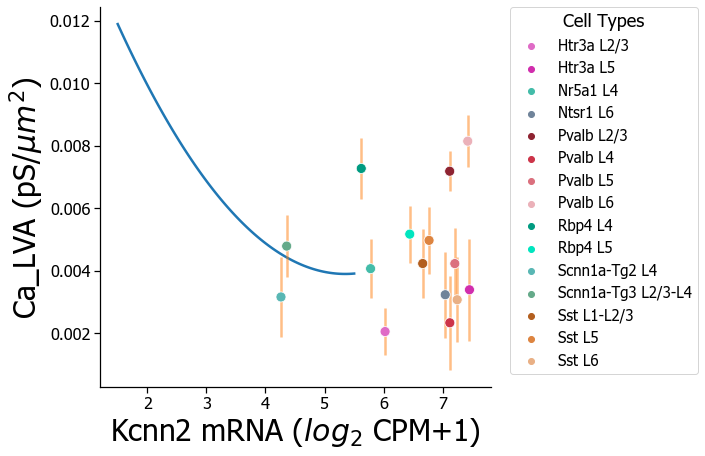

In [31]:
graph_conductance_exp_inc_4('gbar_Ca_LVA', 'Kcnn2', sep_layer_cre_parameter_df)


In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def graph_conductance_exp_inc_4(parameter_type, parameter_type2, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    cre_parameter_df_spec2 = df[[parameter_type2]]
    cre_conductance_filtered2 = cre_parameter_df_spec2[cre_parameter_df_spec2[parameter_type2].notna()]
    cre_conductance_filtered2 = cre_conductance_filtered2.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered2.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec = pd.concat([graph_spec, cre_conductance_filtered2], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    graph_spec.sort_values(by=[gene_id], inplace=True)
    print(graph_spec)
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(graph_spec[gene_id], graph_spec[parameter_type], graph_spec[parameter_type2], c='skyblue', s=60)
    ax.set(xlabel='Kcnn2', ylabel='Ca_LVA', zlabel='SK')
    ax.view_init(30, 185)
    plt.show()

                    gbar_Ca_HVA     66050   gbar_SK
Scnn1a-Tg2 L4          0.000690  4.262058  0.077876
Scnn1a-Tg3 L2/3-L4     0.000592  4.358147  0.009373
Rbp4 L4                0.000613  5.619918  0.033747
Nr5a1 L4               0.000480  5.777790  0.017505
Htr3a L2/3             0.000362  6.022747  0.067356
Rbp4 L5                0.000297  6.440279  0.027596
Sst L1-L2/3            0.000581  6.659448  0.002156
Sst L5                 0.000406  6.766755  0.001949
Ntsr1 L6               0.000568  7.040428  0.044394
Pvalb L2/3             0.000364  7.116015  0.014408
Pvalb L4               0.000398  7.118076  0.019854
Pvalb L5               0.000575  7.202627  0.024287
Sst L6                 0.000578  7.242950  0.000852
Pvalb L6               0.000592  7.421051  0.000052
Htr3a L5               0.000619  7.450464  0.000643


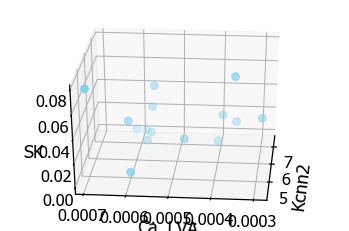

In [33]:
graph_conductance_exp_inc_4('gbar_Ca_HVA', 'gbar_SK', 'Kcnn2', sep_layer_cre_parameter_df)


In [34]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    print(graph_spec)
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(4, 10, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='Hcn1 mRNA ($log_2$ CPM+1)', ylabel='Ih Conductance (pS/$\mu m^2$)')
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)
    
    print(graph_spec)
    plt.savefig("{}_{}.svg".format(parameter_type, gene_symbol), format="svg")
    plt.show()


                     gbar_Ih     66050
Htr3a L2/3          0.000763  6.022747
Htr3a L5            0.000185  7.450464
Nr5a1 L4            0.000201  5.777790
Ntsr1 L6            0.000136  7.040428
Pvalb L2/3          0.000383  7.116015
Pvalb L4            0.001345  7.118076
Pvalb L5            0.000481  7.202627
Pvalb L6            0.000638  7.421051
Rbp4 L4             0.000166  5.619918
Rbp4 L5             0.002895  6.440279
Scnn1a-Tg2 L4       0.001161  4.262058
Scnn1a-Tg3 L2/3-L4  0.000832  4.358147
Sst L1-L2/3         0.001361  6.659448
Sst L5              0.000782  6.766755
Sst L6              0.000602  7.242950
                     gbar_Ih     66050
Htr3a L2/3          0.000763  6.022747
Htr3a L5            0.000185  7.450464
Nr5a1 L4            0.000201  5.777790
Ntsr1 L6            0.000136  7.040428
Pvalb L2/3          0.000383  7.116015
Pvalb L4            0.001345  7.118076
Pvalb L5            0.000481  7.202627
Pvalb L6            0.000638  7.421051
Rbp4 L4             0.000

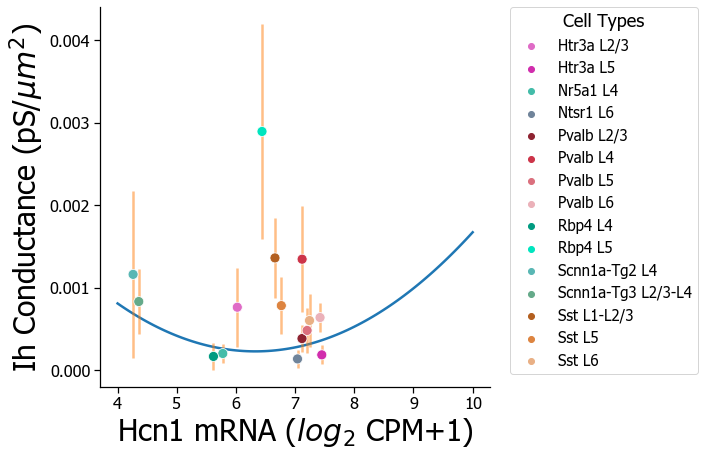

In [35]:
graph_conductance_exp_inc_4('gbar_Ih', 'Hcn1', sep_layer_cre_parameter_df)


In [36]:
#Set-up for palette for cell types based on Cre-line
old_cre_color_inc_4 = ['Htr3a-Cre_NO152__L2/3__inh',
             'Htr3a-Cre_NO152__L5__inh',
             'Nr5a1-Cre__L4__exc',
             'Ntsr1-Cre_GN220__L6__exc',
             'Pvalb-IRES-Cre__L2/3__inh',
             'Pvalb-IRES-Cre__L4__inh',
             'Pvalb-IRES-Cre__L5__inh',
             'Pvalb-IRES-Cre__L6__inh',
             'Rbp4-Cre_KL100__L4__exc',
             'Rbp4-Cre_KL100__L5__exc',
             'Scnn1a-Tg2-Cre__L4__exc',
            "Scnn1a-Tg3-Cre__L4__exc",
                   "Sst-IRES-Cre__L2/3__inh",
             'Sst-IRES-Cre__L5__inh',
             'Sst-IRES-Cre__L6__inh']

cre_color_inc_4 = ['Htr3a-Cre_NO152__L2/3__inh',
             'Htr3a-Cre_NO152__L5__inh',
             'Nr5a1-Cre__L4__exc',
             'Ntsr1-Cre_GN220__L6__exc',
             'Pvalb-IRES-Cre__L2/3__inh',
             'Pvalb-IRES-Cre__L4__inh',
             'Pvalb-IRES-Cre__L5__inh',
             'Pvalb-IRES-Cre__L6__inh',
             'Rbp4-Cre_KL100__L4__exc',
             'Rbp4-Cre_KL100__L5__exc',
             'Scnn1a-Tg2-Cre__L4__exc',
             'Scnn1a-Tg3-Cre__L2/3-L4__exc',
             'Sst-IRES-Cre__L1-L2/3__inh',
             'Sst-IRES-Cre__L5__inh',
             'Sst-IRES-Cre__L6__inh']

cre_line_palette_inc_4 = {'Htr3a-Cre_NO152__L2/3__inh':"#DF6BC6",
                    'Htr3a-Cre_NO152__L5__inh':"#D12DAD", 
                    'Nr5a1-Cre__L4__exc':"#43BCA9",
                    'Ntsr1-Cre_GN220__L6__exc':"#70849A",
                    'Pvalb-IRES-Cre__L2/3__inh':"#8E2331",
                    'Pvalb-IRES-Cre__L4__inh':"#CD3449",
                    'Pvalb-IRES-Cre__L5__inh':"#DB707E",
                    'Pvalb-IRES-Cre__L6__inh':"#EBB1b9",
                    'Rbp4-Cre_KL100__L4__exc':"#009B81",
                    'Rbp4-Cre_KL100__L5__exc':"#00E5BF",
                    'Scnn1a-Tg2-Cre__L4__exc':"#59B7B4",
                    'Scnn1a-Tg3-Cre__L2/3-L4__exc':"#65AA8A",
                    'Sst-IRES-Cre__L1-L2/3__inh':"#B35F1F",
                    'Sst-IRES-Cre__L5__inh':"#DD8440",
                    'Sst-IRES-Cre__L6__inh':"#E9B085"}

all_features['cell_type'] = 'False'
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))
    
inverse = 1/all_features['upstroke_downstroke_ratio_long_square']
all_features['downstroke'] = inverse
e_feature = 'downstroke'
feature_type = all_features[['cell_type', e_feature]]
avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
filtered_avg_feature_type = avg_feature_type.filter(items=old_cre_color_inc_4)
filtered_avg_feature_type.rename(index = {"Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True)

C:\Users\shreejoy_tripathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


                              gbar_Kv3_1  downstroke
cell_type                                           
Htr3a-Cre_NO152__L2/3__inh      0.235402    0.350586
Htr3a-Cre_NO152__L5__inh        0.638604    0.453195
Nr5a1-Cre__L4__exc              0.126182    0.309418
Ntsr1-Cre_GN220__L6__exc        0.149601    0.387361
Pvalb-IRES-Cre__L2/3__inh       0.693312    0.829529
Pvalb-IRES-Cre__L4__inh         1.121246    0.798104
Pvalb-IRES-Cre__L5__inh         1.266772    0.784156
Pvalb-IRES-Cre__L6__inh         1.250779    0.792478
Rbp4-Cre_KL100__L4__exc         0.190676    0.291317
Rbp4-Cre_KL100__L5__exc         0.124294    0.318946
Scnn1a-Tg2-Cre__L4__exc         0.118571    0.296838
Scnn1a-Tg3-Cre__L2/3-L4__exc    0.182939    0.309421
Sst-IRES-Cre__L1-L2/3__inh      0.261797    0.613878
Sst-IRES-Cre__L5__inh           0.515266    0.574596
Sst-IRES-Cre__L6__inh           0.661893    0.623638
[0.3505863349761761, 0.45319481698180725, 0.3094175944098135, 0.3873612985594559, 0.829529493328516

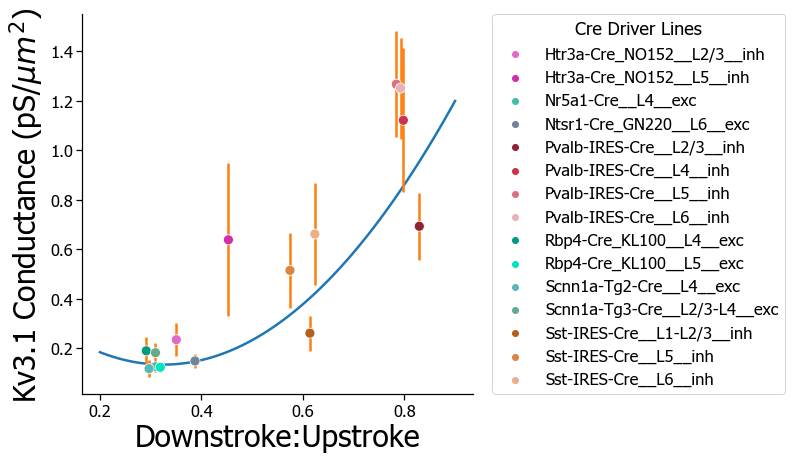

In [42]:

parameter_type = 'gbar_Kv3_1'
cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
filtered_cre = list(cre_conductance_filtered.index)

    
graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

print(graph_spec)
std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
inv_errors = 1/errors
    
plt.figure(figsize=(7, 7))   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
    
z = np.polyfit(x=graph_spec[e_feature], y=graph_spec[parameter_type], deg=2, w=inv_errors)
p = np.poly1d(z)
xp = np.linspace(0.2, .9, 100)
_ = plt.plot(xp, p(xp), '-', zorder=1)

ax = sns.scatterplot(x=e_feature, y=parameter_type, hue=cre_color_inc_4, data=graph_spec, s = 100, palette=cre_line_palette_inc_4, zorder=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set(xlabel='Downstroke:Upstroke', ylabel='Kv3.1 Conductance (pS/$\mu m^2$)')

x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
print(x_coords)
print(graph_spec)
    
std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', zorder=2)
plt.savefig("{}_{}.svg".format(parameter_type, e_feature), format="svg")


C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


[0.08501084916569085, 0.05584206603443588, 0.04524097157021365, 0.11692205274646937, 0.05245837037052425, 0.0396126847329509, 0.045122079040675646, 0.04125876724720002, 0.08782236998819787, 0.11696935719565339, 0.0705459896578557, 0.04871617074717177, 0.11241264579196777, 0.08557381867351728, 0.0745179831214688]
                               gbar_Ih       sag
cell_type                                       
Htr3a-Cre_NO152__L2/3__inh    0.000763  0.085011
Htr3a-Cre_NO152__L5__inh      0.000185  0.055842
Nr5a1-Cre__L4__exc            0.000201  0.045241
Ntsr1-Cre_GN220__L6__exc      0.000136  0.116922
Pvalb-IRES-Cre__L2/3__inh     0.000383  0.052458
Pvalb-IRES-Cre__L4__inh       0.001345  0.039613
Pvalb-IRES-Cre__L5__inh       0.000481  0.045122
Pvalb-IRES-Cre__L6__inh       0.000638  0.041259
Rbp4-Cre_KL100__L4__exc       0.000166  0.087822
Rbp4-Cre_KL100__L5__exc       0.002895  0.116969
Scnn1a-Tg2-Cre__L4__exc       0.001161  0.070546
Scnn1a-Tg3-Cre__L2/3-L4__exc  0.000832  0.048716


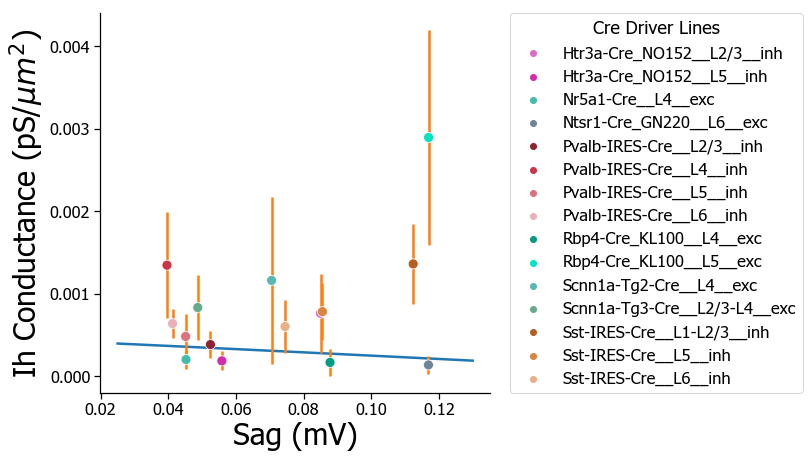

In [44]:
all_features['cell_type'] = 'False'
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

e_feature = 'sag'
feature_type = all_features[['cell_type', e_feature]]
avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
filtered_avg_feature_type = avg_feature_type.filter(items=old_cre_color_inc_4)
filtered_avg_feature_type.rename(index = {"Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True)

parameter_type = 'gbar_Ih'
cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
filtered_cre = list(cre_conductance_filtered.index)
    
graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
inv_errors = 1/errors

plt.figure(figsize=(7, 7))   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
    
z = np.polyfit(x=graph_spec[e_feature], y=graph_spec[parameter_type], deg=2, w=inv_errors)
p = np.poly1d(z)
xp = np.linspace(0.025, 0.13, 100)
_ = plt.plot(xp, p(xp), '-', zorder=1)

ax = sns.scatterplot(x=e_feature, y=parameter_type, hue=cre_color_inc_4, data=graph_spec, s = 100, palette=cre_line_palette_inc_4, zorder=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set(xlabel='Sag (mV)', ylabel='Ih Conductance (pS/$\mu m^2$)')

x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
print(x_coords)
print(graph_spec)
    
std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', zorder=2)
plt.savefig("{}_{}.svg".format(parameter_type, e_feature), format="svg")


In [63]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    
    std_cre = abs_sem.loc[cre_color_inc_4,:]
    errors = std_cre['gbar_Kv3_1_abs']
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(2, 10, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='Kcnc1 mRNA ($log_2$ CPM+1)', ylabel='Absolute Kv3.1 Conductance (pS)')
    
    
    
    plt.savefig("abs_{}_{}.svg".format(parameter_type, gene_symbol), format="svg")
    plt.show()


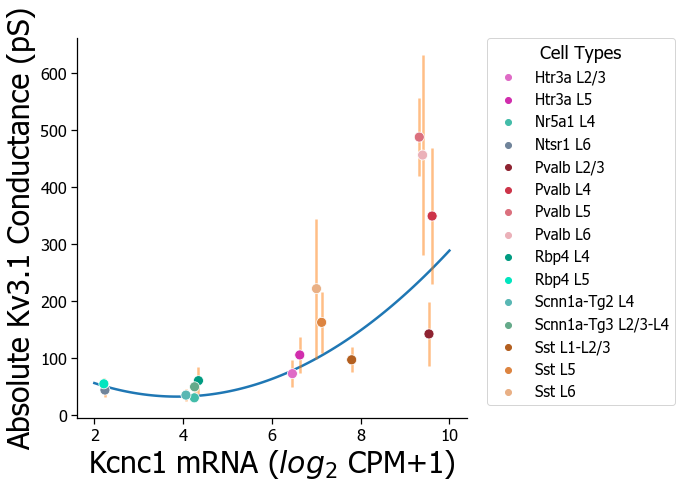

In [66]:
graph_conductance_exp_inc_4('abs_gbar_Kv3_1', 'Kcnc1', abs_parameter_df)


In [65]:
threshold_v_long_square fast_trough_v_long_square

SyntaxError: invalid syntax (<ipython-input-65-10c97bbf532c>, line 1)

In [45]:
all_features['cell_type'] = 'False'
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [46]:
all_features['trough_difference'] = all_features['threshold_v_long_square'] - all_features['fast_trough_v_long_square']

In [47]:
e_feature = 'trough_difference'

[14.462588672906586, 14.898238059801937, 12.098437817891442, 12.714773143421528, 23.26785818735759, 22.9687517967777, 22.609940287578535, 22.860796494917427, 9.305707268092949, 9.038377929152105, 9.959202289581306, 11.393182546442215, 18.249999745686846, 16.73153472669197, 20.762868881225575]
                               gbar_SK  trough_difference
cell_type                                                
Htr3a-Cre_NO152__L2/3__inh    0.067356          14.462589
Htr3a-Cre_NO152__L5__inh      0.000643          14.898238
Nr5a1-Cre__L4__exc            0.017505          12.098438
Ntsr1-Cre_GN220__L6__exc      0.044394          12.714773
Pvalb-IRES-Cre__L2/3__inh     0.014408          23.267858
Pvalb-IRES-Cre__L4__inh       0.019854          22.968752
Pvalb-IRES-Cre__L5__inh       0.024287          22.609940
Pvalb-IRES-Cre__L6__inh       0.000052          22.860796
Rbp4-Cre_KL100__L4__exc       0.033747           9.305707
Rbp4-Cre_KL100__L5__exc       0.027596           9.038378
Scnn1a-Tg2

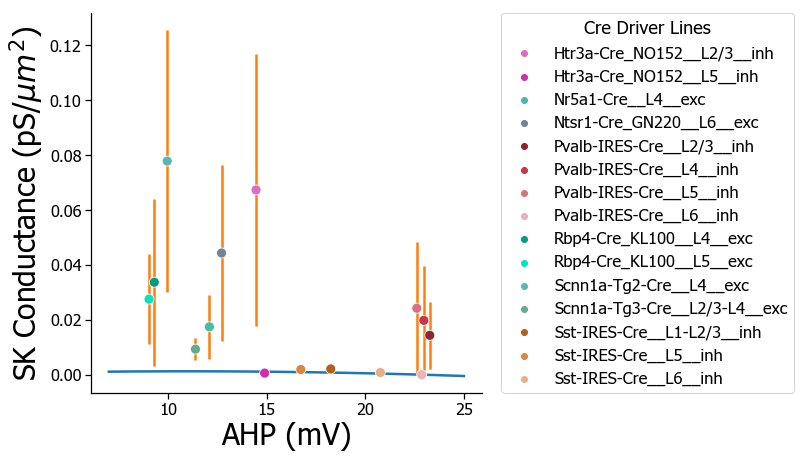

In [49]:
feature_type = all_features[['cell_type', e_feature]]
avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
filtered_avg_feature_type = avg_feature_type.filter(items=old_cre_color_inc_4)
filtered_avg_feature_type.rename(index = {"Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True)

parameter_type = 'gbar_SK'
cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
filtered_cre = list(cre_conductance_filtered.index)
    
graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
inv_errors = 1/errors

plt.figure(figsize=(7, 7))   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
    
z = np.polyfit(x=graph_spec[e_feature], y=graph_spec[parameter_type], deg=2, w=inv_errors)
p = np.poly1d(z)
xp = np.linspace(7, 25, 100)
_ = plt.plot(xp, p(xp), '-', zorder=1)

ax = sns.scatterplot(x=e_feature, y=parameter_type, hue=cre_color_inc_4, data=graph_spec, s = 100, palette=cre_line_palette_inc_4, zorder=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set(xlabel='AHP (mV)', ylabel='SK Conductance (pS/$\mu m^2$)')

x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
print(x_coords)
print(graph_spec)
    
std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', zorder=2)
plt.savefig("{}_{}.svg".format(parameter_type, e_feature), format="svg")


In [92]:
def plot_compare(e_feature, parameter_type):

    all_features['cell_type'] = 'False'
    cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

    for index, row in cre_layer_dendrite.iterrows():
        if row['structure_layer'][0] != '6':
            layer_label = 'L' + row['structure_layer']
        else:
            layer_label = 'L6'
        if row['dendrite_type'] == 'spiny':
            dendrite_label = 'exc'
        else:
            dendrite_label = 'inh'
        all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

    feature_type = all_features[['cell_type', e_feature]]
    avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
    filtered_avg_feature_type = avg_feature_type.filter(items=cre_color_inc_4)
    filtered_avg_feature_type

    cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)

    graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors

    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'

    z = np.polyfit(x=graph_spec[e_feature], y=graph_spec[parameter_type], deg=2)
    p = np.poly1d(z)
    xp = np.linspace(-65, -40, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)

    ax = sns.scatterplot(x=e_feature, y=parameter_type, hue=cre_color_inc_4, data=graph_spec, s = 100, palette=cre_line_palette_inc_4, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel = 'fast_trough_v_long_square (mV)', ylabel='SK Conductance (pS/$\mu m^2$)')

    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    print(x_coords)
    print(graph_spec)

    plt.savefig("unweighted_{}_{}.svg".format(parameter_type, e_feature), format="svg")
    
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', zorder=2)


In [55]:
def compare(e_feature, parameter_type):

    all_features['cell_type'] = 'False'
    cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

    for index, row in cre_layer_dendrite.iterrows():
        if row['structure_layer'][0] != '6':
            layer_label = 'L' + row['structure_layer']
        else:
            layer_label = 'L6'
        if row['dendrite_type'] == 'spiny':
            dendrite_label = 'exc'
        else:
            dendrite_label = 'inh'
        all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

    feature_type = all_features[['cell_type', e_feature]]
    avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
    filtered_avg_feature_type = avg_feature_type.filter(items=cre_color_inc_4)
    filtered_avg_feature_type

    cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)

    graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

    return spearmanr(graph_spec)

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


[-52.41549532178422, -53.83814337314705, -48.89218934377035, -48.22897942282937, -59.4330385298956, -59.969205939251445, -61.536523152546714, -64.38210504705256, -47.22418727045474, -47.33498054638245, -45.831599129570854, -58.840437744603015, -60.562502692727485]
                             gbar_SK  fast_trough_v_long_square
cell_type                                                      
Htr3a-Cre_NO152__L2/3__inh  0.067356                 -52.415495
Htr3a-Cre_NO152__L5__inh    0.000643                 -53.838143
Nr5a1-Cre__L4__exc          0.017505                 -48.892189
Ntsr1-Cre_GN220__L6__exc    0.044394                 -48.228979
Pvalb-IRES-Cre__L2/3__inh   0.014408                 -59.433039
Pvalb-IRES-Cre__L4__inh     0.019854                 -59.969206
Pvalb-IRES-Cre__L5__inh     0.024287                 -61.536523
Pvalb-IRES-Cre__L6__inh     0.000052                 -64.382105
Rbp4-Cre_KL100__L4__exc     0.033747                 -47.224187
Rbp4-Cre_KL100__L5__exc     0.0

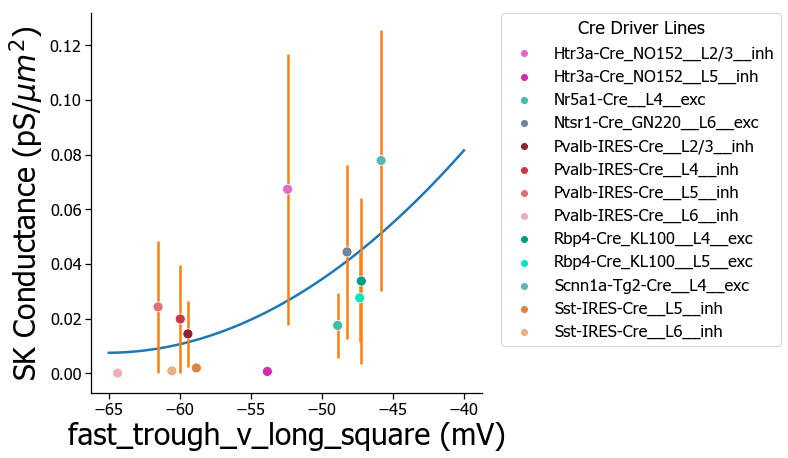

In [93]:
plot_compare('fast_trough_v_long_square', 'gbar_SK')

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


[-52.41549532178422, -53.83814337314705, -48.89218934377035, -48.22897942282937, -59.4330385298956, -59.969205939251445, -61.536523152546714, -64.38210504705256, -47.22418727045474, -47.33498054638245, -45.831599129570854, -47.365343267267406, -57.193751780192066, -58.840437744603015, -60.562502692727485]
                               gbar_SK  fast_trough_v_long_square
cell_type                                                        
Htr3a-Cre_NO152__L2/3__inh    0.067356                 -52.415495
Htr3a-Cre_NO152__L5__inh      0.000643                 -53.838143
Nr5a1-Cre__L4__exc            0.017505                 -48.892189
Ntsr1-Cre_GN220__L6__exc      0.044394                 -48.228979
Pvalb-IRES-Cre__L2/3__inh     0.014408                 -59.433039
Pvalb-IRES-Cre__L4__inh       0.019854                 -59.969206
Pvalb-IRES-Cre__L5__inh       0.024287                 -61.536523
Pvalb-IRES-Cre__L6__inh       0.000052                 -64.382105
Rbp4-Cre_KL100__L4__exc       0.0

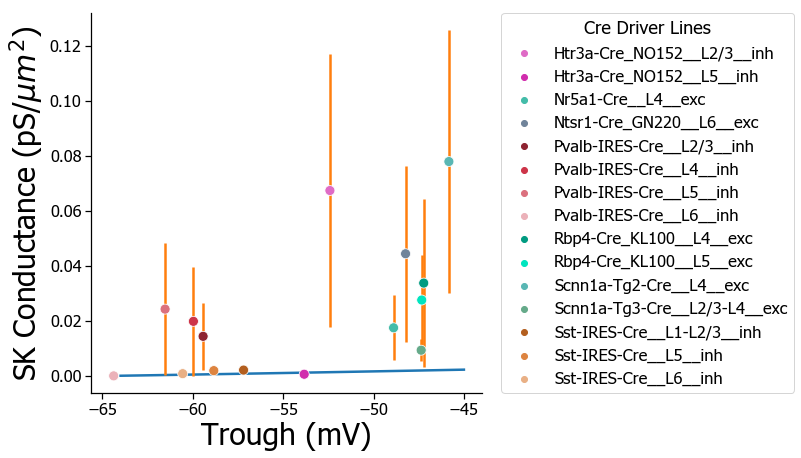

In [55]:
all_features['cell_type'] = 'False'
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

e_feature = 'fast_trough_v_long_square'
feature_type = all_features[['cell_type', e_feature]]
avg_feature_type = feature_type.groupby('cell_type')[e_feature].mean()
filtered_avg_feature_type = avg_feature_type.filter(items=old_cre_color_inc_4)
filtered_avg_feature_type.rename(index = {"Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True)

parameter_type = 'gbar_SK'
cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
filtered_cre = list(cre_conductance_filtered.index)
    
graph_spec = pd.concat([cre_conductance_filtered, filtered_avg_feature_type], axis = 1)

std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
inv_errors = 1/errors

plt.figure(figsize=(7, 7))   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
    
z = np.polyfit(x=graph_spec[e_feature], y=graph_spec[parameter_type], deg=2, w=inv_errors)
p = np.poly1d(z)
xp = np.linspace(-64, -45, 100)
_ = plt.plot(xp, p(xp), '-', zorder=1)

ax = sns.scatterplot(x=e_feature, y=parameter_type, hue=cre_color_inc_4, data=graph_spec, s = 100, palette=cre_line_palette_inc_4, zorder=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set(xlabel='Trough (mV)', ylabel='SK Conductance (pS/$\mu m^2$)')

x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
print(x_coords)
print(graph_spec)
    
std_cre = sem.loc[cre_color_inc_4,:]
errors = std_cre[parameter_type]
ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', zorder=2)
plt.savefig("{}_{}.svg".format(parameter_type, e_feature), format="svg")


In [27]:
ephys = ['average_contraction', 'average_diameter', 'average_fragmentation', 'average_parent_daughter_ratio',
 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope', 'fast_trough_t_long_square', 'fast_trough_t_ramp',
 'fast_trough_t_short_square', 'fast_trough_v_long_square', 'fast_trough_v_ramp', 'fast_trough_v_short_square',
 'input_resistance_mohm', 'latency','max_branch_order', 'max_euclidean_distance', 'max_path_distance',
 'number_bifurcations', 'number_branches', 'number_nodes', 'number_stems', 'number_tips', 'overall_depth', 
 'overall_height', 'overall_width', 'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square', 'peak_v_long_square',
 'peak_v_ramp', 'peak_v_short_square', 'ri', 'sag', 'scale_factor_x', 'scale_factor_y', 'scale_factor_z', 'seal_gohm',
 'slow_trough_t_long_square', 'slow_trough_t_ramp', 'slow_trough_t_short_square', 'slow_trough_v_long_square', 
 'slow_trough_v_ramp', 'slow_trough_v_short_square', 'soma_surface', 'tau', 'threshold_i_long_square', 
 'threshold_i_ramp', 'threshold_i_short_square', 'threshold_t_long_square', 'threshold_t_ramp', 
 'threshold_t_short_square', 'threshold_v_long_square', 'threshold_v_ramp', 'threshold_v_short_square', 
 'total_length', 'total_surface', 'total_volume', 'trough_t_long_square', 'trough_t_ramp', 'trough_t_short_square',
 'trough_v_long_square', 'trough_v_ramp', 'trough_v_short_square', 'upstroke_downstroke_ratio_long_square', 
 'upstroke_downstroke_ratio_ramp', 'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest']

compare_dict = {}

for fe in ephys:
    compare_dict[fe] = compare(fe, 'gbar_SK').correlation


C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [28]:

import operator

sorted_x = sorted(compare_dict.items(), key=operator.itemgetter(1))
print(sorted_x)

[('average_fragmentation', -0.6868131868131868), ('f_i_curve_slope', -0.6208791208791209), ('overall_width', -0.5384615384615384), ('slow_trough_v_long_square', -0.5274725274725275), ('input_resistance_mohm', -0.5054945054945055), ('average_parent_daughter_ratio', -0.4505494505494505), ('slow_trough_t_short_square', -0.3516483516483516), ('slow_trough_v_ramp', -0.34065934065934067), ('trough_v_short_square', -0.3131868131868132), ('trough_t_ramp', -0.2857142857142857), ('vrest', -0.2582417582417582), ('slow_trough_t_long_square', -0.23076923076923078), ('fast_trough_t_ramp', -0.22527472527472525), ('peak_t_ramp', -0.22527472527472525), ('threshold_i_ramp', -0.22527472527472525), ('threshold_t_ramp', -0.22527472527472525), ('slow_trough_v_short_square', -0.21978021978021978), ('average_contraction', -0.20329670329670327), ('ri', -0.19780219780219782), ('slow_trough_t_ramp', -0.14285714285714285), ('threshold_i_long_square', -0.12087912087912088), ('trough_t_short_square', -0.08241758241

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


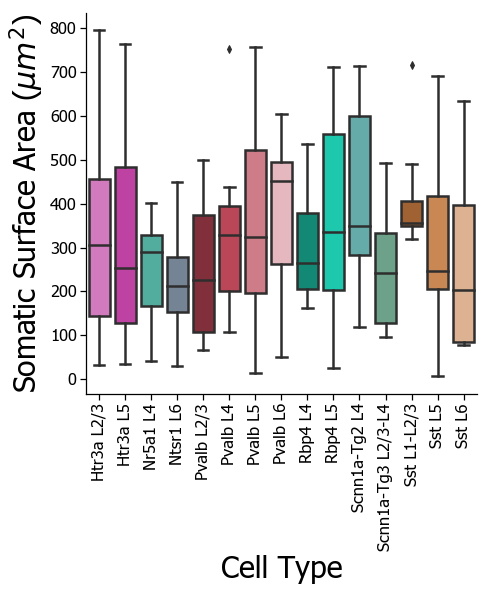

In [19]:
all_features['cell_type'] = 'False'
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]

for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))
    
plt.figure(figsize=(7, 7))      
    
sa_plot = all_features[all_features['cell_type'].isin(['Htr3a-Cre_NO152__L2/3__inh',
             'Htr3a-Cre_NO152__L5__inh',
             'Nr5a1-Cre__L4__exc',
             'Ntsr1-Cre_GN220__L6__exc',
             'Pvalb-IRES-Cre__L2/3__inh',
             'Pvalb-IRES-Cre__L4__inh',
             'Pvalb-IRES-Cre__L5__inh',
             'Pvalb-IRES-Cre__L6__inh',
             'Rbp4-Cre_KL100__L4__exc',
             'Rbp4-Cre_KL100__L5__exc',
             'Scnn1a-Tg2-Cre__L4__exc',
             "Scnn1a-Tg3-Cre__L4__exc",
             "Sst-IRES-Cre__L2/3__inh",
             'Sst-IRES-Cre__L5__inh',
             'Sst-IRES-Cre__L6__inh'])]


sa_plot['cell_type'] = sa_plot['cell_type'].map({"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            "Scnn1a-Tg3-Cre__L4__exc":'Scnn1a-Tg3 L2/3-L4',
                               "Sst-IRES-Cre__L2/3__inh":'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'})

sa_plot.sort_values(by=['cell_type'], inplace=True)
sa_plot = sa_plot[sa_plot['soma_surface'] <= 810]


ax = sns.boxplot(x="cell_type", y="soma_surface", data=sa_plot, palette=shortened_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)
ax.set(xlabel='Cell Type', ylabel='Somatic Surface Area ($\mu m^2$)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig("cell_type_surface_area.svg", format="svg")
plt.show()


In [66]:
def create_matrix(parameter, abs_spearman_dict):
    d = {"symbol": list(abs_spearman_dict[parameter].keys()), "correlation": list(abs_spearman_dict[parameter].values())}
    test = pd.DataFrame(d)
    return test.sort_values(by=['correlation'])

def histo_corr(parameter, df):
    test = create_matrix(parameter, df)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    listof = []
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            listof.append(row['correlation'])
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    ax = sns.distplot(listof, bins=len(listof))
    

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='KT Conductance \n Spearman Correlation', ylabel='Frequency')
    plt.savefig("hist_{}.svg".format(parameter), format="svg")
    plt.show()

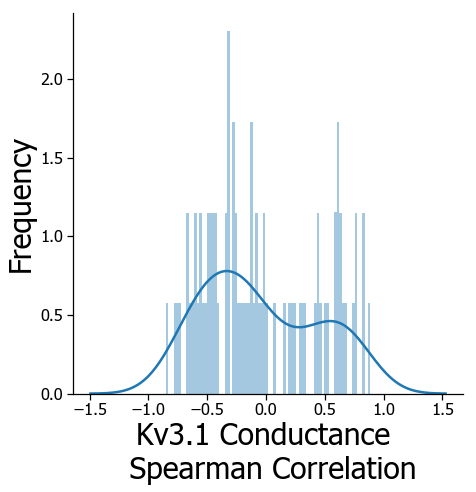

In [65]:
histo_corr('gbar_Kv3_1', sep_spearman_corr_ranks)


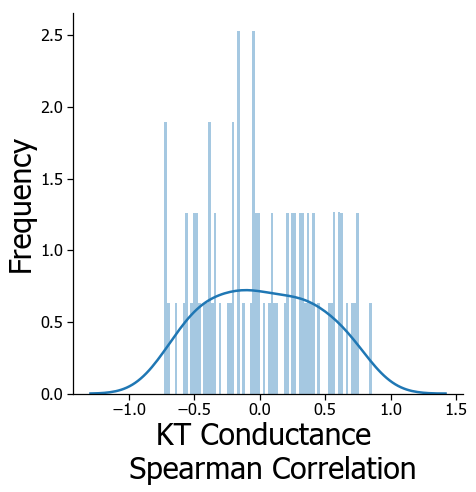

In [68]:
histo_corr('gbar_K_T', sep_spearman_corr_ranks)

In [71]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    print(graph_spec)
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(0, 8, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='Kcnk3 mRNA ($log_2$ CPM+1)', ylabel='Kv3.1 Conductance (pS/$\mu m^2$)')
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)
    
    print(graph_spec)
    plt.savefig("{}_{}.svg".format(parameter_type, gene_symbol), format="svg")
    plt.show()


                    gbar_Kv3_1     16527
Htr3a L2/3            0.235402  2.176182
Htr3a L5              0.638604  3.140183
Nr5a1 L4              0.126182  0.986909
Ntsr1 L6              0.149601  3.042333
Pvalb L2/3            0.693312  6.282937
Pvalb L4              1.121246  6.635035
Pvalb L5              1.266772  6.818171
Pvalb L6              1.250779  7.186689
Rbp4 L4               0.190676  0.748580
Rbp4 L5               0.124294  1.834329
Scnn1a-Tg2 L4         0.118571  0.388144
Scnn1a-Tg3 L2/3-L4    0.182939  0.752815
Sst L1-L2/3           0.261797  3.774529
Sst L5                0.515266  4.348591
Sst L6                0.661893  5.624128
                    gbar_Kv3_1     16527
Htr3a L2/3            0.235402  2.176182
Htr3a L5              0.638604  3.140183
Nr5a1 L4              0.126182  0.986909
Ntsr1 L6              0.149601  3.042333
Pvalb L2/3            0.693312  6.282937
Pvalb L4              1.121246  6.635035
Pvalb L5              1.266772  6.818171
Pvalb L6        

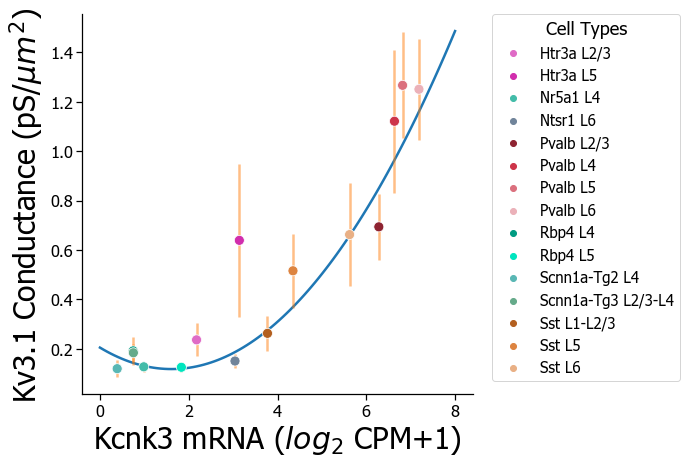

In [72]:
graph_conductance_exp_inc_4('gbar_Kv3_1', 'Kcnk3', sep_layer_cre_parameter_df)


In [17]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp_inc_4(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    cre_conductance_filtered = cre_conductance_filtered.loc[cre_color_inc_4 , : ]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[cre_color_inc_4])
    
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    graph_spec.rename(index = {"Htr3a-Cre_NO152__L5__inh":"Htr3a L5", 
                               'Htr3a-Cre_NO152__L2/3__inh':'Htr3a L2/3',
             'Nr5a1-Cre__L4__exc':'Nr5a1 L4',
             'Ntsr1-Cre_GN220__L6__exc':'Ntsr1 L6',
             'Pvalb-IRES-Cre__L2/3__inh':'Pvalb L2/3',
             'Pvalb-IRES-Cre__L4__inh':'Pvalb L4',
             'Pvalb-IRES-Cre__L5__inh':'Pvalb L5',
             'Pvalb-IRES-Cre__L6__inh':'Pvalb L6',
             'Rbp4-Cre_KL100__L4__exc':'Rbp4 L4',
             'Rbp4-Cre_KL100__L5__exc':'Rbp4 L5',
             'Scnn1a-Tg2-Cre__L4__exc':'Scnn1a-Tg2 L4',
            'Scnn1a-Tg3-Cre__L2/3-L4__exc':'Scnn1a-Tg3 L2/3-L4',
                               'Sst-IRES-Cre__L1-L2/3__inh':'Sst L1-L2/3', 
             'Sst-IRES-Cre__L5__inh':'Sst L5',
             'Sst-IRES-Cre__L6__inh':'Sst L6'}, 
                                 inplace = True) 
    print(graph_spec)
    std_cre = sem.loc[cre_color_inc_4,:]
    errors = std_cre[parameter_type]
    inv_errors = 1/errors
    
    plt.figure(figsize=(7, 7))   
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.rcParams['svg.fonttype'] = 'none'
    
    z = np.polyfit(x=graph_spec[gene_id], y=graph_spec[parameter_type], deg=2, w=inv_errors)
    p = np.poly1d(z)
    xp = np.linspace(0, 8, 100)
    _ = plt.plot(xp, p(xp), '-', zorder=1)
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=shortened_color, data=graph_spec, s = 100, palette=shortened_palette, zorder=3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cell Types", fontsize=15)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Tahoma']
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set(xlabel='Kcns3 mRNA ($log_2$ CPM+1)', ylabel='KT Conductance (pS/$\mu m^2$)')
    
    # Find the x,y coordinates for each point
    x_coords = []
    y_coords = []
    for point_pair in ax.collections:
        for x, y in point_pair.get_offsets():
            x_coords.append(x)
            y_coords.append(y)
    
    ax.errorbar(x_coords, y_coords, yerr=errors, fmt=' ', alpha=.5 ,zorder=2)
    
    print(graph_spec)
    plt.savefig("{}_{}.svg".format(parameter_type, gene_symbol), format="svg")
    plt.show()


                    gbar_K_T    238076
Htr3a L2/3          0.027881  1.140589
Htr3a L5            0.039555  1.854964
Nr5a1 L4            0.010409  0.019343
Ntsr1 L6            0.010718  0.010309
Pvalb L2/3          0.087971  7.309413
Pvalb L4            0.048264  7.032631
Pvalb L5            0.031250  6.837686
Pvalb L6            0.043909  7.675973
Rbp4 L4             0.000826  0.000000
Rbp4 L5             0.033591  0.686708
Scnn1a-Tg2 L4       0.009921  0.000000
Scnn1a-Tg3 L2/3-L4  0.015906  0.091415
Sst L1-L2/3         0.027985  5.154346
Sst L5              0.017352  2.915451
Sst L6              0.049357  4.540446
                    gbar_K_T    238076
Htr3a L2/3          0.027881  1.140589
Htr3a L5            0.039555  1.854964
Nr5a1 L4            0.010409  0.019343
Ntsr1 L6            0.010718  0.010309
Pvalb L2/3          0.087971  7.309413
Pvalb L4            0.048264  7.032631
Pvalb L5            0.031250  6.837686
Pvalb L6            0.043909  7.675973
Rbp4 L4             0.000

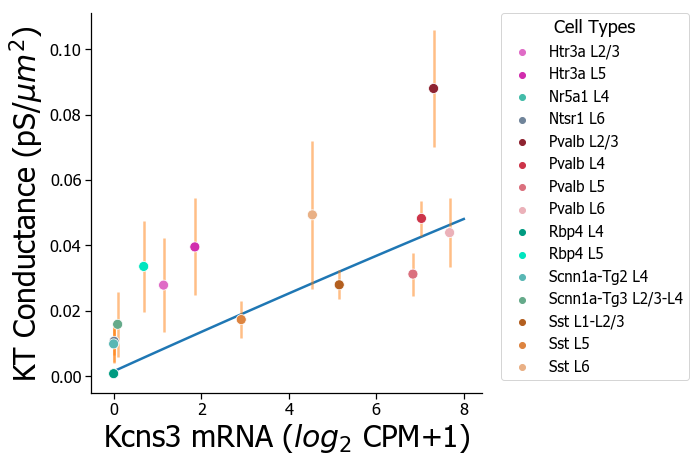

In [18]:
graph_conductance_exp_inc_4('gbar_K_T', 'Kcns3', sep_layer_cre_parameter_df)
